In [6]:
library('ggplot2')
library('dplyr')
library('tidyr')
library(Metrics)
library(reshape2)
library(caret)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Loading required package: lattice

Attaching package: ‘caret’

The following objects are masked from ‘package:Metrics’:

    precision, recall



## Import Data

In [1]:
data <- read.csv('drive_time_sedans.csv')

In [2]:
head(data)

data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
TRAIN,4662,18,NO,69384,FAMILY.SMALL,Import,4,FOUR,SILVER,MAZDA,TX,MAZDA.PROTEGE
TRAIN,4459,65,NO,58239,ECONOMY,Import,4,FOUR,RED,GEO,FL,GEO.METRO
TRAIN,4279,1,NO,58999,ECONOMY,Import,3,ONE-THREE,RED,KIA,TX,KIA.SEPHIA
TRAIN,4472,37,NO,47234,FAMILY.MEDIUM,Domestic,6,SIX,BLUE,MERCURY,NM,MERCURY.MYSTIQUE
TRAIN,5256,12,NO,64674,FAMILY.SMALL,Domestic,3,ONE-THREE,GOLD,CHEVROLET,CA,CHEVROLET.CAVALIER


In [3]:
summary(data)

     data.set      total.cost   lot.sale.days    overage        mileage      
 TEST    :4376   Min.   :1375   Min.   :  0.00   NO :14011   Min.   :    82  
 TRAIN   :8753   1st Qu.:4300   1st Qu.:  7.00   YES: 3495   1st Qu.: 67242  
 VALIDATE:4377   Median :4852   Median : 24.00               Median : 77961  
                 Mean   :4895   Mean   : 46.82               Mean   : 76950  
                 3rd Qu.:5444   3rd Qu.: 74.00               3rd Qu.: 89090  
                 Max.   :9813   Max.   :300.00               Max.   :119250  
                                                                             
        vehicle.type  domestic.import   vehicle.age     vehicle.age.group
 ECONOMY      :2142   Domestic:12035   Min.   : 1.000   FIVE     :4012   
 FAMILY.LARGE :2940   Import  : 5471   1st Qu.: 4.000   FOUR     :3393   
 FAMILY.MEDIUM:6897                    Median : 5.000   ONE-THREE:2127   
 FAMILY.SMALL :3069                    Mean   : 5.441   SEVEN+   :4537   
 LUXUR

In [4]:
str(data)

'data.frame':	17506 obs. of  13 variables:
 $ data.set         : Factor w/ 3 levels "TEST","TRAIN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ total.cost       : int  4037 4662 4459 4279 4472 5256 5522 3194 4332 4249 ...
 $ lot.sale.days    : int  135 18 65 1 37 12 7 16 7 42 ...
 $ overage          : Factor w/ 2 levels "NO","YES": 2 1 1 1 1 1 1 1 1 1 ...
 $ mileage          : int  67341 69384 58239 58999 47234 64674 92879 67197 98403 87183 ...
 $ vehicle.type     : Factor w/ 5 levels "ECONOMY","FAMILY.LARGE",..: 2 4 1 1 3 4 2 4 3 3 ...
 $ domestic.import  : Factor w/ 2 levels "Domestic","Import": 1 2 2 2 1 1 1 1 1 1 ...
 $ vehicle.age      : int  8 4 4 3 6 3 5 6 4 6 ...
 $ vehicle.age.group: Factor w/ 5 levels "FIVE","FOUR",..: 4 2 2 3 5 3 1 5 2 5 ...
 $ color.set        : Factor w/ 8 levels "BLACK","BLUE",..: 7 7 6 6 2 3 6 7 8 7 ...
 $ makex            : Factor w/ 20 levels "BUICK","CADILLAC",..: 1 12 8 11 13 3 1 18 3 19 ...
 $ state            : Factor w/ 8 levels "AZ","CA","FL",..: 2 7 3 7 5 2 6

In [7]:
sum(is.na(data))

[1] 0

## Exploratory Analysis

First, histogram of different continuous variables are developed to examine their distribution

For total cost, the majority of the cars cost $3000-6000

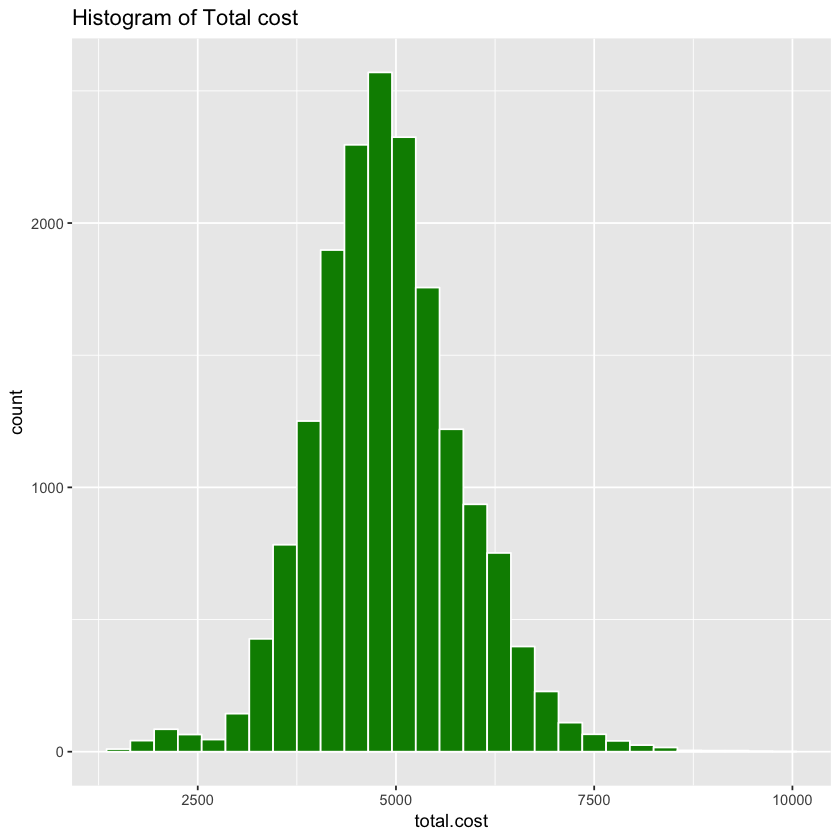

In [7]:
## Histogram of total cost
data %>%
ggplot(aes(total.cost)) +
geom_histogram(binwidth = 300, fill = "green4", color = "white") +
ggtitle('Histogram of Total cost')
ggsave('histogram1.png', width = 8, height = 4)

lot.sale.days are skewed toward left side. 80% of the cars are sold within the first 90 days. The rest 20% are sold after 20 days and are sold at discount price or at the auction

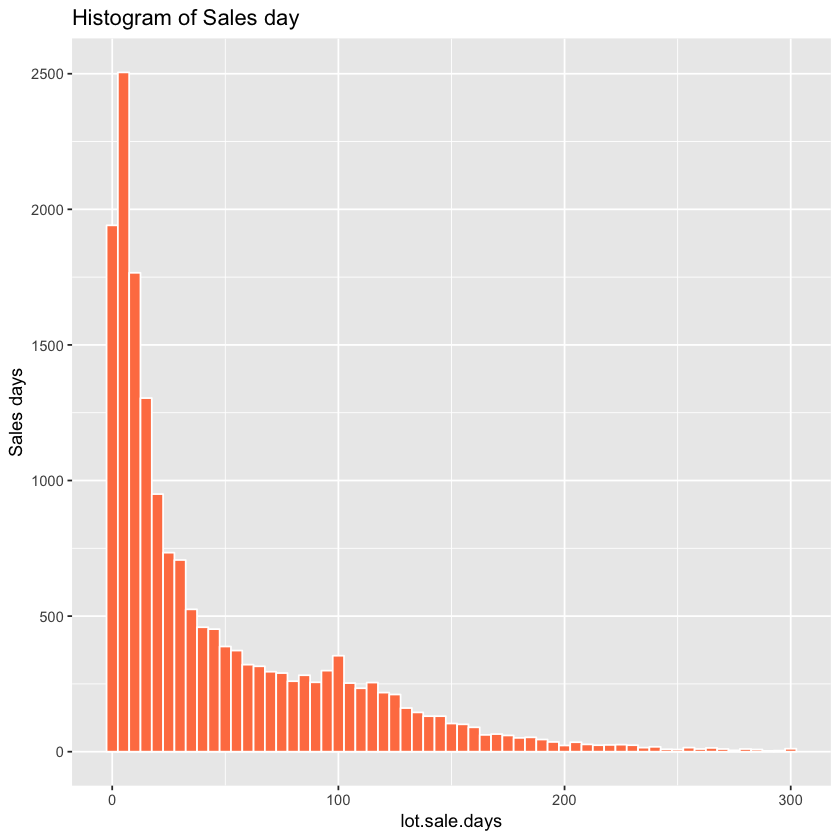

In [5]:
#Histogram of lot.sale.days
data %>%
ggplot(aes(lot.sale.days)) +
geom_histogram(binwidth = 5, fill = "coral", color = "white") +
ggtitle('Histogram of Sales day') +
labs(y = "Sales days")
ggsave('histogram2.png', width = 8, height = 4)

Majority of mileage are in the range 60000 - 90000

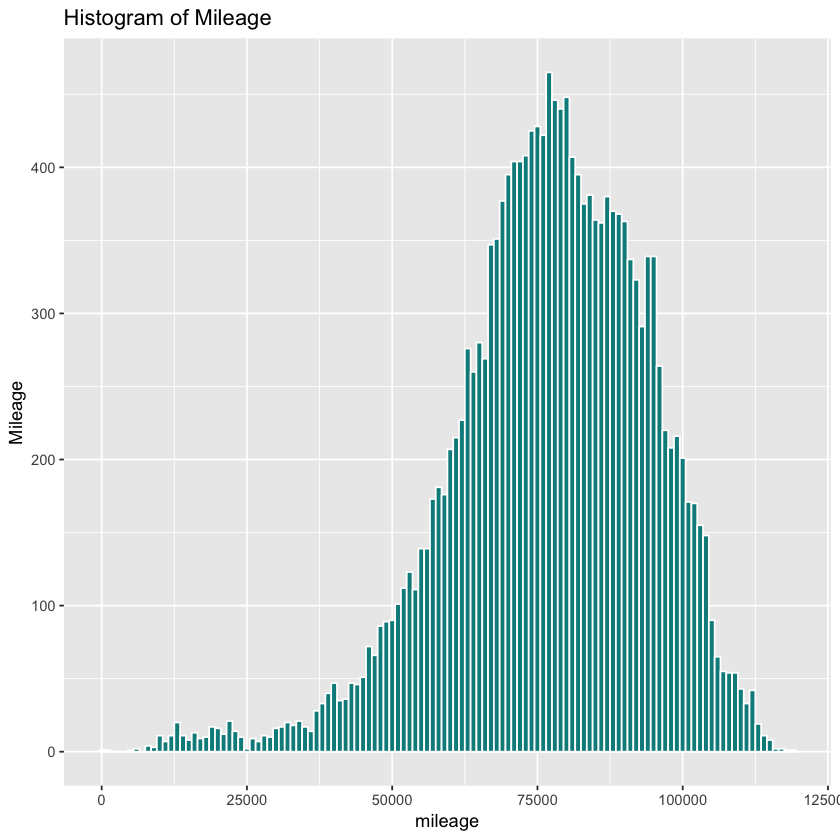

In [6]:
#Histogram of mileage
data %>%
ggplot(aes(mileage)) +
geom_histogram(binwidth = 1000, fill = "cyan4", color = "white") +
ggtitle('Histogram of Mileage') +
labs(y = "Mileage")
ggsave('histogram3.png', width = 8, height = 4)

Most cars have the age from 3-7

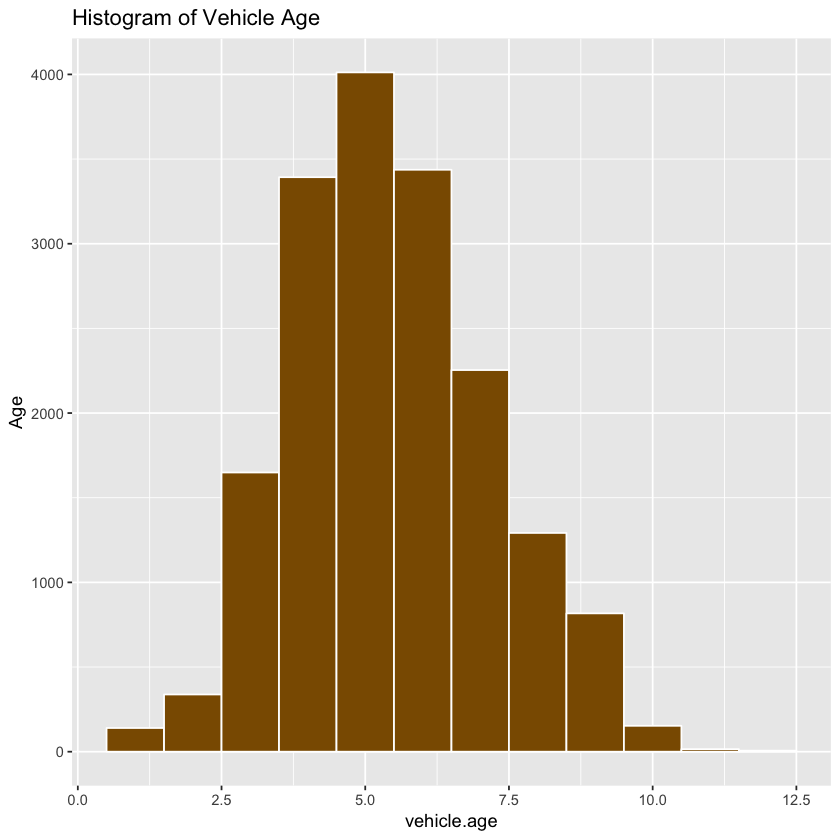

In [7]:
#Histogram of vehicle age
data %>%
ggplot(aes(vehicle.age)) +
geom_histogram(binwidth = 1, fill = "orange4", color = "white") +
ggtitle('Histogram of Vehicle Age') +
labs(y = "Age")
ggsave('histogram4.png', width = 8, height = 4)

In [8]:
#correlation heat map of continuous variable
cormat <- round(cor(data[ ,c('mileage', 'vehicle.age', 'lot.sale.days', 'total.cost')]),2)
melted_format <- melt(cormat)
head(melted_format)

Var1,Var2,value
mileage,mileage,1.00
vehicle.age,mileage,0.46
lot.sale.days,mileage,0.04
total.cost,mileage,-0.12
mileage,vehicle.age,0.46
vehicle.age,vehicle.age,1.00


The heatmap between pair combinations of continous variables in the dataset shows that there is no strong correlation between them, espectially lot.sale.days. Correlation coefficient between the dependent variable with vehicle.age and total.cost are only 0.15, meaning that there might be a slightly positive relationship between sales days and cost and between sales day and age.

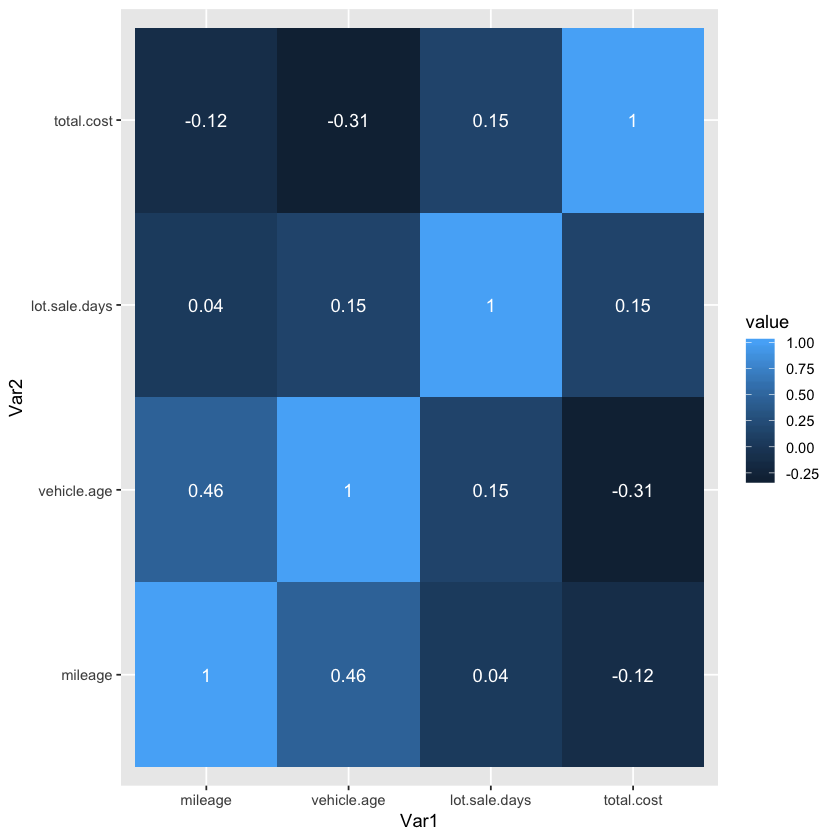

In [9]:
ggplot(data = melted_format, aes(x=Var1, y=Var2, fill=value )) + 
  geom_tile() + geom_text(aes(label = value), color = 'white')
ggsave('Correlation_heatmap.png', width = 5, height = 5)

To be more specific, we draw the scatter plot between sales days and other continuous variables

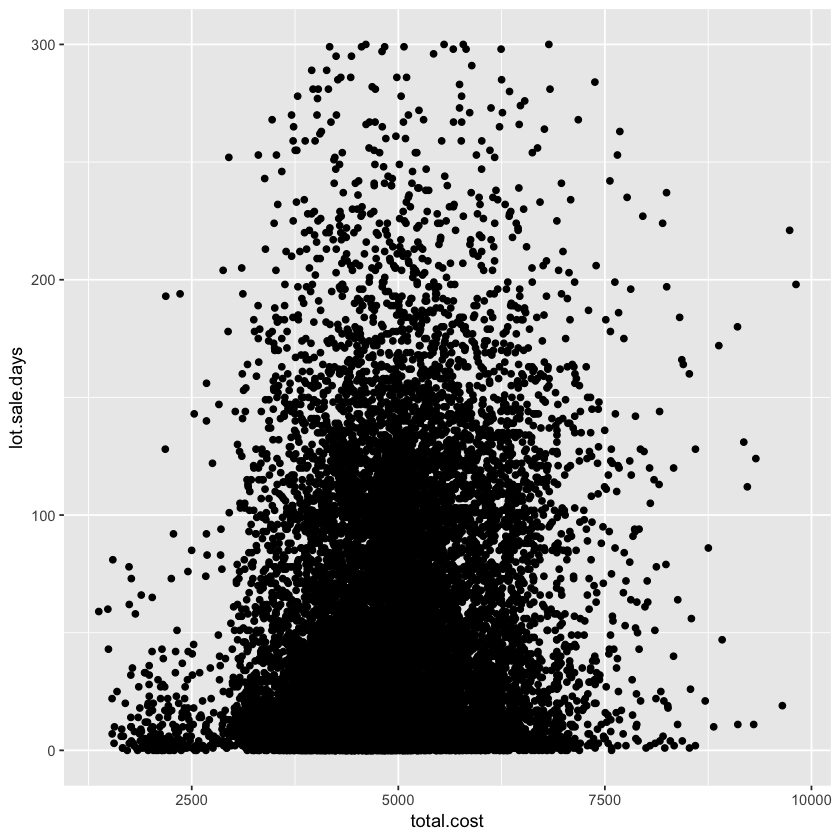

In [10]:
#scatter plot between sales days and total cost
data %>% 
ggplot(aes(total.cost, lot.sale.days)) +
geom_point()
ggsave("Total cost vs. Sales days.png", width = 5, height =5)

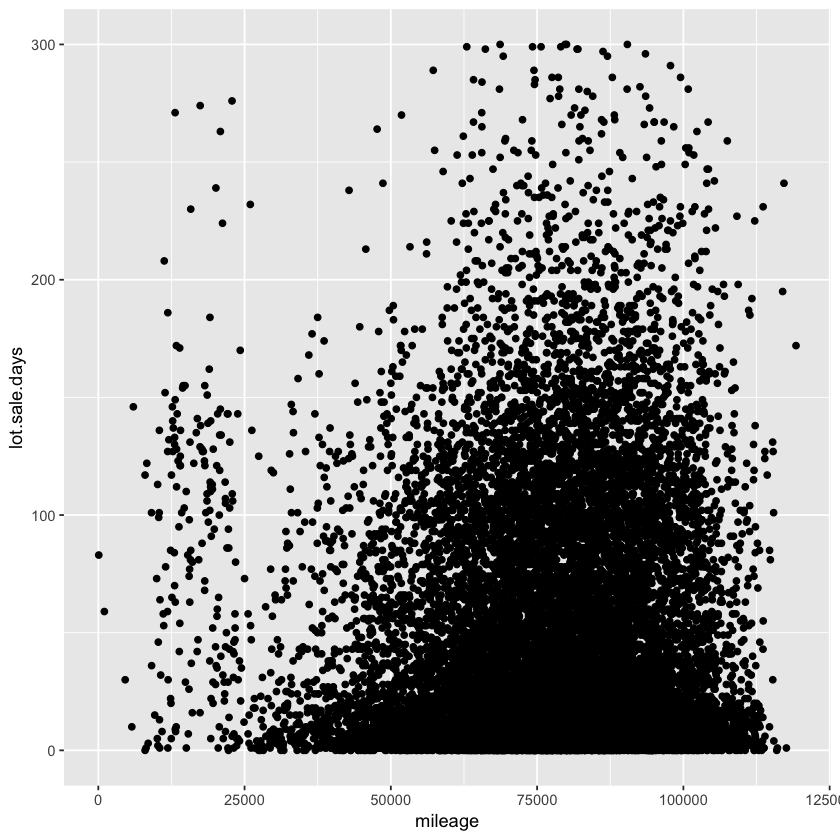

In [7]:
#scatter plot between sales days and mileage
data %>% 
ggplot(aes(mileage, lot.sale.days)) +
geom_point()
ggsave("Mileage vs. Sales days.png", width = 5, height =5)

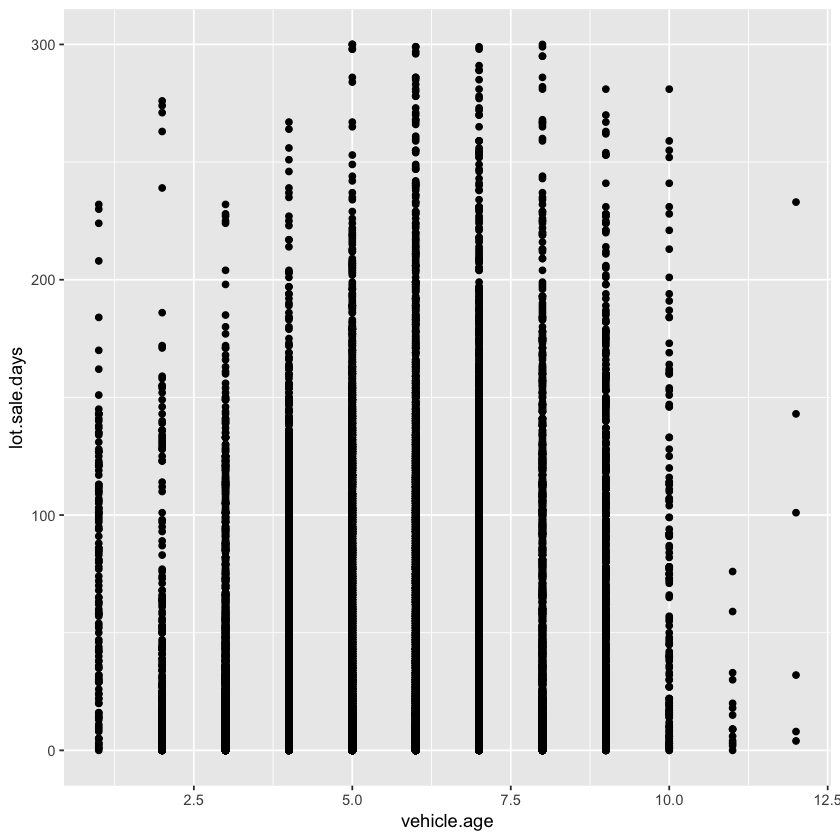

In [11]:
data %>% 
ggplot(aes(vehicle.age, lot.sale.days)) +
geom_point()
ggsave("Vehicle Age vs. Sales days.png", width = 5, height =5)

Next, we examine the categorical variables by creating boxplots. It can help us to know whether variations in these variables can affect the sales days

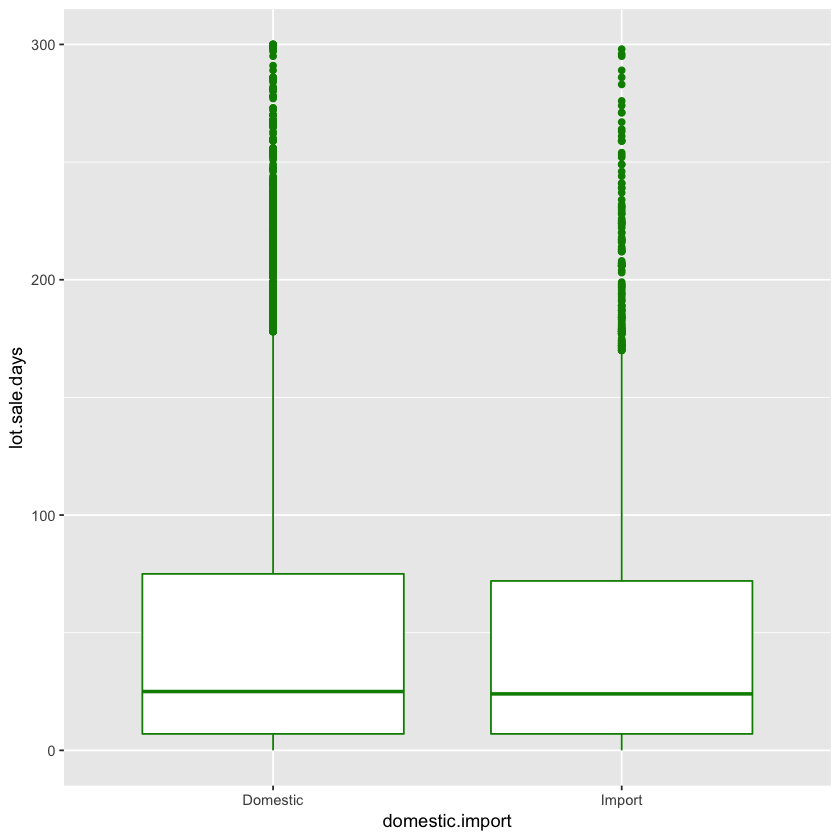

In [12]:
#Domestic/import
data %>%
ggplot(aes(domestic.import, lot.sale.days)) +
geom_boxplot(color = "green4")
ggsave('Domestic_import.png', width = 5, height =5)

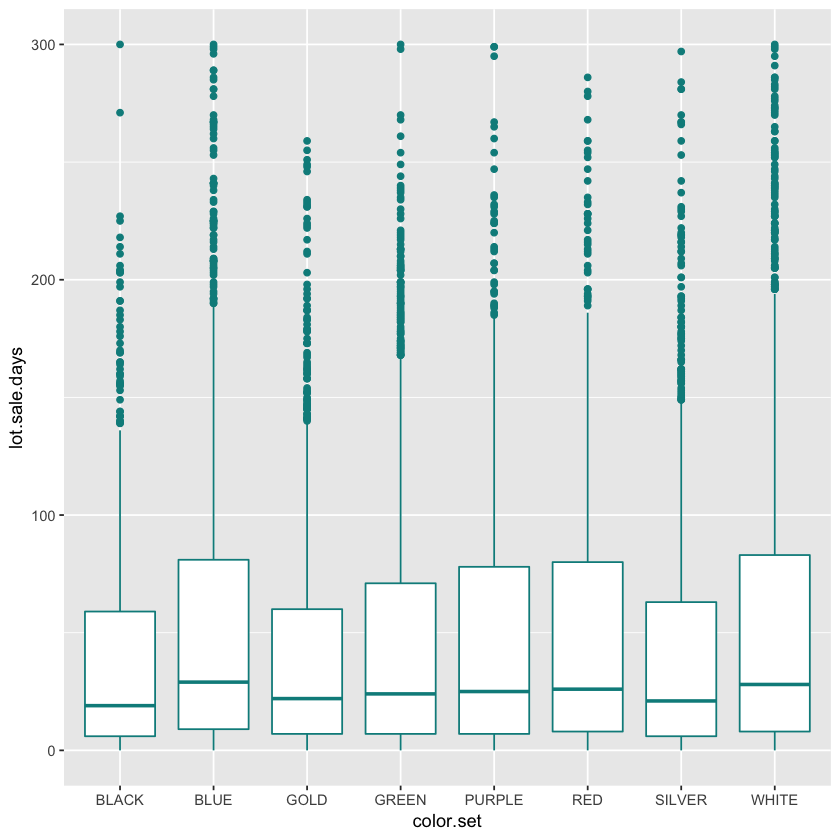

In [34]:
#Color set
data %>%
ggplot(aes(color.set, lot.sale.days)) +
geom_boxplot(color = "cyan4")
ggsave('colorset.png', width = 5, height =5)

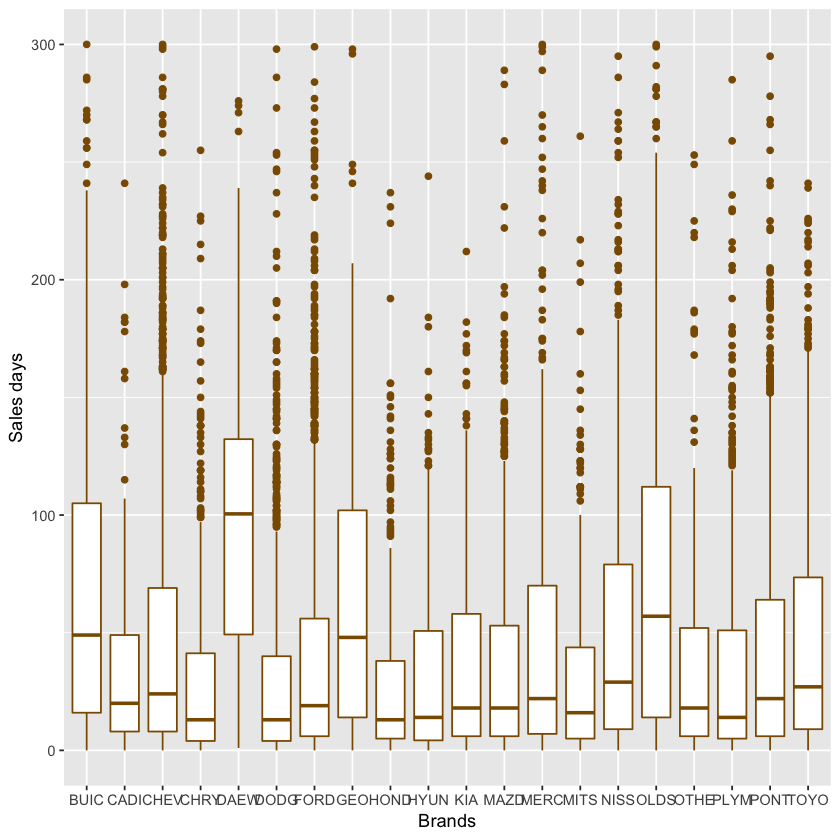

In [13]:
#makex
data %>%
ggplot(aes(makex, lot.sale.days)) +
geom_boxplot(color = "orange4") +
labs(x = "Brands", y = "Sales days") +
scale_x_discrete(labels = abbreviate)
ggsave('makex.png', width = 10, height =5)

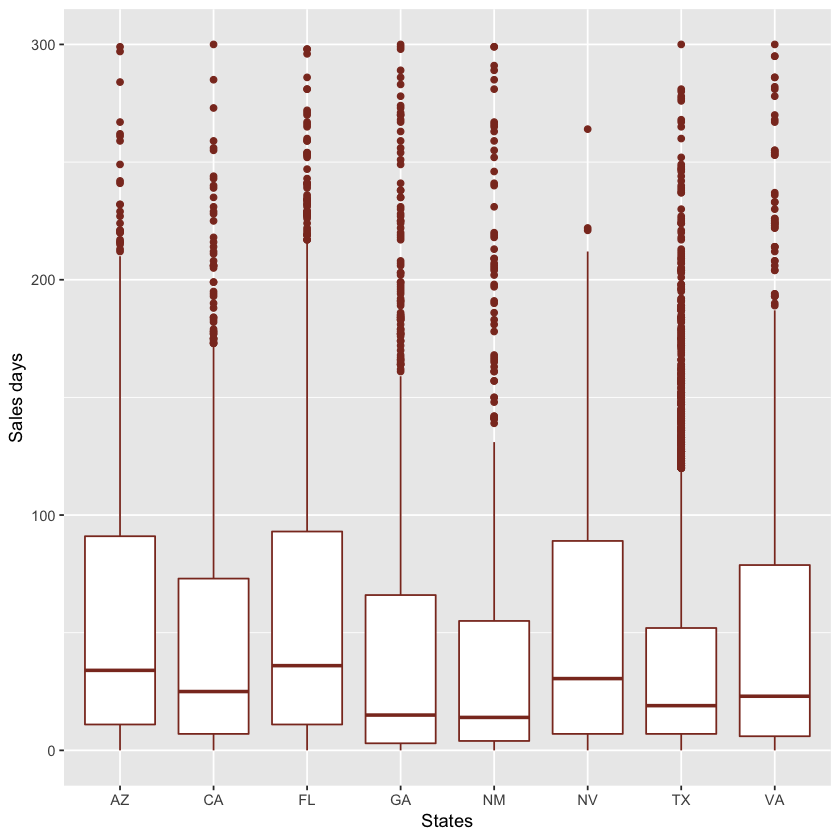

In [65]:
#state
data %>%
ggplot(aes(state, lot.sale.days)) +
geom_boxplot(color = "tomato4") +
labs(x = "States", y = "Sales days") 
ggsave('states.png', width = 10, height =5)

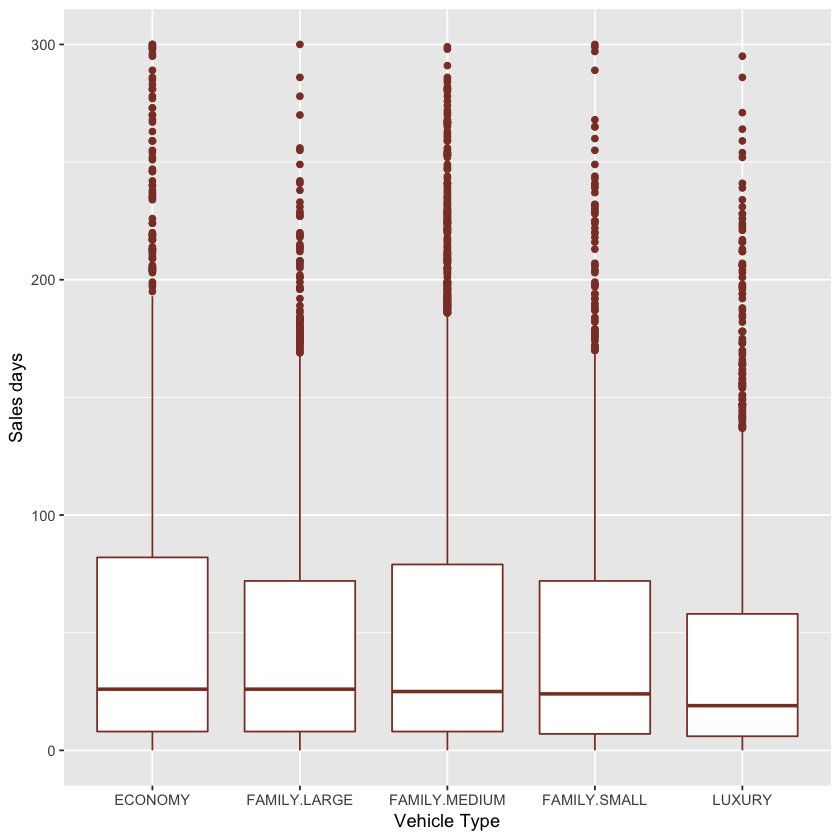

In [14]:
#Vehicle type
data %>%
ggplot(aes(vehicle.type, lot.sale.days)) +
geom_boxplot(color = "coral4") +
labs(x = "Vehicle Type", y = "Sales days") 
ggsave('vehicletype.png', width = 10, height =5)

#### Inference from the EDA

- No strong linear relationship. Cost and Verticle age are more likely to have some small influence on lot sales day
- Brands affect the sales days too because some brands have very high sales day (DEAWOO, OLDS, GEO)
- It's faster to sell used car in some states than other (GA, NM) than (NV, AZ, FL)
- Economy car seems to take longest time to sell but no big difference with other types of car

## Model Selection

In [8]:
#removing the make.model that its frequency is less than 4
data.new <- data %>% group_by(make.model) %>% filter(n() > 3) %>% ungroup()
head(data.new)

data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
TRAIN,4662,18,NO,69384,FAMILY.SMALL,Import,4,FOUR,SILVER,MAZDA,TX,MAZDA.PROTEGE
TRAIN,4459,65,NO,58239,ECONOMY,Import,4,FOUR,RED,GEO,FL,GEO.METRO
TRAIN,4279,1,NO,58999,ECONOMY,Import,3,ONE-THREE,RED,KIA,TX,KIA.SEPHIA
TRAIN,4472,37,NO,47234,FAMILY.MEDIUM,Domestic,6,SIX,BLUE,MERCURY,NM,MERCURY.MYSTIQUE
TRAIN,5256,12,NO,64674,FAMILY.SMALL,Domestic,3,ONE-THREE,GOLD,CHEVROLET,CA,CHEVROLET.CAVALIER


In [9]:
#Seperate the data
train <- data.new %>% filter(data.set == "TRAIN")
test <- data.new %>% filter(data.set == "TEST")
validate <- data.new %>% filter(data.set == "VALIDATE")

Here is the process for model building:
- Using train dataset to build the model using linear regression. Intepret the result to guide the decision process of selecting car
- Evaluate the model by a) using MSE/MAPE 
- Make prediction on the sales days and effect on profit

In [10]:
# Model 1
model <- lm(lot.sale.days ~ mileage + total.cost + vehicle.age + 
             color.set + makex + state + vehicle.type, data = data.new[1:8738,])

In [11]:
# Model 2
model2 <- lm(lot.sale.days ~ mileage + total.cost + color.set + make.model + vehicle.age + state, data = data.new[1:8738,])

In [10]:
summary(model)


Call:
lm(formula = lot.sale.days ~ mileage + total.cost + vehicle.age + 
    color.set + makex + state + vehicle.type, data = data[1:8738, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-134.86  -31.49  -11.16   23.77  245.15 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -7.441e+01  6.234e+00 -11.937  < 2e-16 ***
mileage                    2.527e-04  3.711e-05   6.809 1.05e-11 ***
total.cost                 1.991e-02  6.434e-04  30.942  < 2e-16 ***
vehicle.age                9.841e+00  4.069e-01  24.185  < 2e-16 ***
color.setBLUE              9.296e+00  2.337e+00   3.977 7.04e-05 ***
color.setGOLD             -1.040e+00  2.529e+00  -0.411 0.681061    
color.setGREEN             6.492e+00  2.226e+00   2.916 0.003550 ** 
color.setPURPLE            8.719e+00  2.476e+00   3.522 0.000431 ***
color.setRED               1.120e+01  2.634e+00   4.250 2.16e-05 ***
color.setSILVER            3.148e+00  2.477e+00   1.2

In [35]:
summary(model2)


Call:
lm(formula = lot.sale.days ~ mileage + total.cost + color.set + 
    make.model + vehicle.age + state, data = data.new[1:8738, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-153.112  -28.575   -7.141   22.232  242.173 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -2.998e+02  1.384e+01 -21.654  < 2e-16 ***
mileage                               5.185e-04  3.575e-05  14.502  < 2e-16 ***
total.cost                            3.111e-02  6.662e-04  46.706  < 2e-16 ***
color.setBLUE                         6.452e+00  2.163e+00   2.983 0.002867 ** 
color.setGOLD                         1.347e+00  2.347e+00   0.574 0.566196    
color.setGREEN                        4.889e+00  2.058e+00   2.375 0.017556 *  
color.setPURPLE                       5.432e+00  2.288e+00   2.374 0.017623 *  
color.setRED                          6.858e+00  2.443e+00   2.807 0.005009 ** 
color.setSILVER    

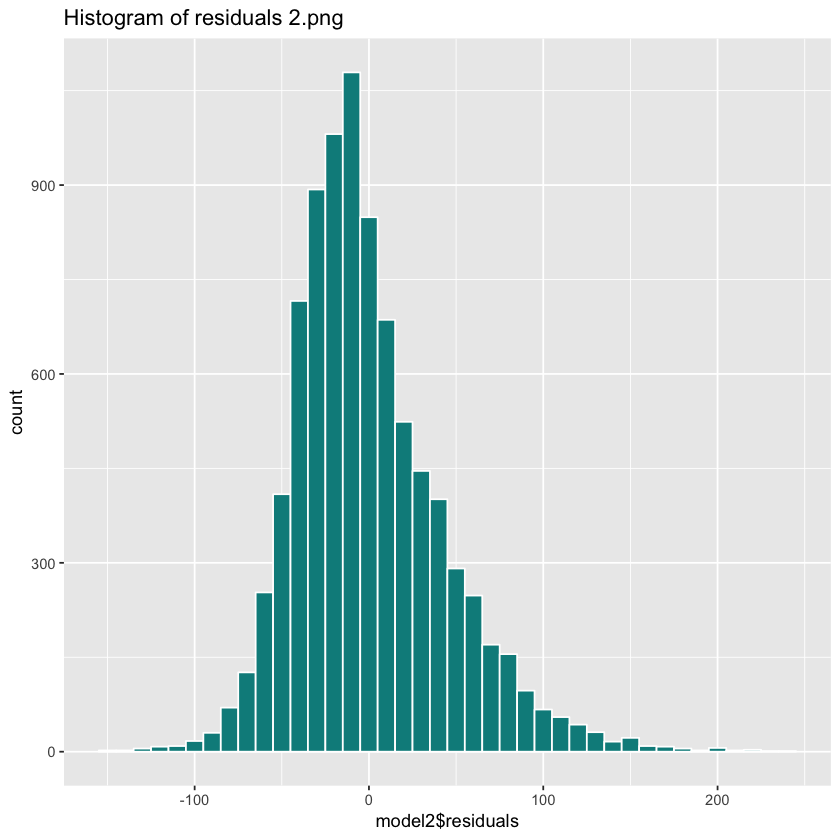

In [36]:
#Histogram of the residuals for Model 2
ggplot(data = train, aes(model2$residuals)) +
geom_histogram(binwidth = 10, color = "white", fill = "cyan4") +
labs(title = "Histogram of residuals 2.png")

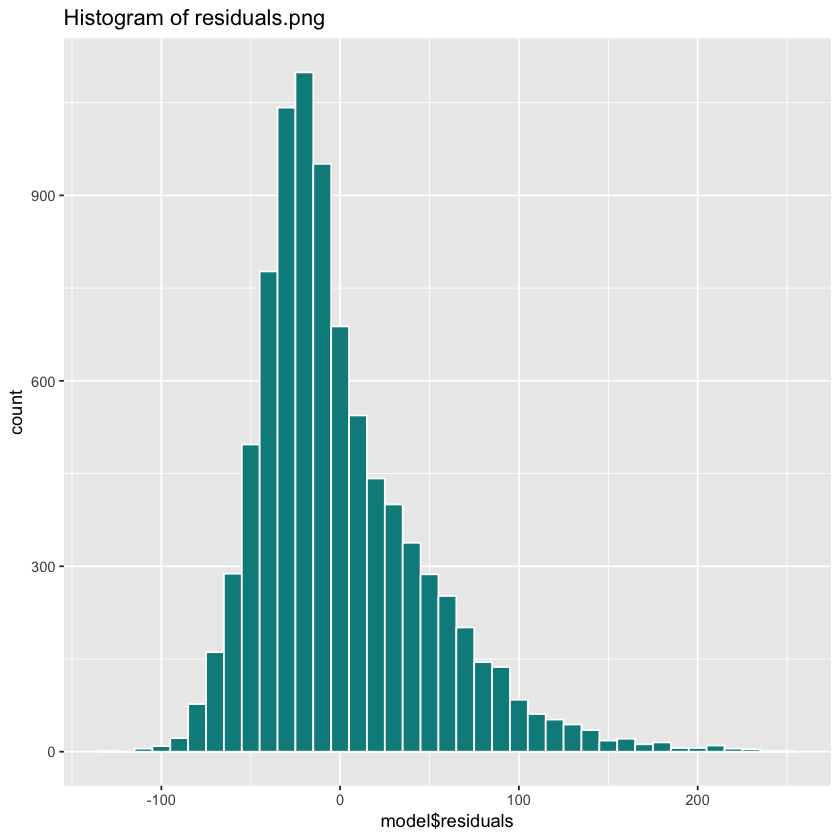

In [14]:
#Histogram of the residuals for Model 2
ggplot(data = train, aes(model$residuals)) +
geom_histogram(binwidth = 10, color = "white", fill = "cyan4") +
labs(title = "Histogram of residuals.png")

Summary of the model shows that:
- An additional 10000 mile of the mileage increases the sales days by 2.53 days on avergae
- An additional 100 in the total cost increases the sales days by 2 days on average
- An additional year of the vehicle age increase the sales days by 9.83 days on average
- Color: In compared with Black, the color BLUE, GREEN, PURPLE, RED and WHITE increase the sales days by 9.29, 6.47, 8.72, 11.5 and 8.7 days respectively. There is no significant difference between GOLD and BLACk, between SILVER and BLACK in term of sales time. 
- Brand: Comparing with BUICK, the other brands tend to have shorter sales days, except DEAWOO and OLDS Mobile. Some brands have much shortest sales days are: HONDA (59 days shorter), TOYOTA (36 days shorter), CADILLAC (57 days shorter), Chrysler (34 days shorter), MAZDA (30 days shorter)
- State: Arizona is the state that have highest sales days. Other states CA, VA, NV have 9-11 shorter in sales days. GA, FL, TX have 2-4 shorter sales days than AZ.
- Vehicle type: Economy cars take the longest time to sell. LUXURY and FAMILY LARGE and FAMILY MEDIUM take shortest time to sell (40 days shorter than economy)

### Prediction using TEST data

In [12]:
#Predict sales days using Test data - Model 1
test_pred <- data.frame(predict = predict(model, data.new[8739:13102,]))
test['Pred_sales_type_1'] <-  as.factor(ifelse(test_pred$predict > 119, "Auction",
                                   ifelse(test_pred$predict < 90, "Non-ovarage", "Overage")))
test['Act_sales_type'] <- as.factor(ifelse(test$lot.sale.days > 119, "Auction", 
                                 ifelse(test$lot.sale.days < 90, "Non-ovarage", "Overage")))

In [13]:
#Predict sales days using Test data - Model 2
test_pred2 <- data.frame(predict = predict(model2,data.new[8739:13102,]))
test['Pred_sales_type2'] <-  as.factor(ifelse(test_pred2$predict > 119, "Auction",
                                   ifelse(test_pred2$predict < 90, "Non-ovarage", "Overage")))

In [39]:
summary(test)

     data.set      total.cost   lot.sale.days    overage       mileage      
 TEST    :4364   Min.   :1537   Min.   :  0.00   NO :3517   Min.   :  4595  
 TRAIN   :   0   1st Qu.:4308   1st Qu.:  7.00   YES: 847   1st Qu.: 67516  
 VALIDATE:   0   Median :4856   Median : 24.00              Median : 78196  
                 Mean   :4902   Mean   : 46.69              Mean   : 77212  
                 3rd Qu.:5432   3rd Qu.: 73.00              3rd Qu.: 89496  
                 Max.   :9327   Max.   :300.00              Max.   :114732  
                                                                            
        vehicle.type  domestic.import  vehicle.age     vehicle.age.group
 ECONOMY      : 547   Domestic:2996   Min.   : 1.000   FIVE     :1007   
 FAMILY.LARGE : 747   Import  :1368   1st Qu.: 4.000   FOUR     : 852   
 FAMILY.MEDIUM:1712                   Median : 5.000   ONE-THREE: 499   
 FAMILY.SMALL : 732                   Mean   : 5.458   SEVEN+   :1120   
 LUXURY       : 626

In [33]:
#Confusion matrix
confusionMatrix(test$Act_sales_type, test$Pred_sales_type_1)

Confusion Matrix and Statistics

             Reference
Prediction    Auction Non-ovarage Overage
  Auction           8         388      69
  Non-ovarage       6        3421      83
  Overage           1         359      29

Overall Statistics
                                          
               Accuracy : 0.7924          
                 95% CI : (0.7801, 0.8043)
    No Information Rate : 0.9551          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0885          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Auction Class: Non-ovarage Class: Overage
Sensitivity                0.533333             0.8208       0.160221
Specificity                0.894918             0.5459       0.913937
Pos Pred Value             0.017204             0.9746       0.074550
Neg Pred Value             0.998205             0.1253       0.961761
Prevalence                 0.003437    

In [14]:
#non-overage accuracy - Model 1
3421/4168*100

[1] 82.07774

In [38]:
confusionMatrix(test$Act_sales_type, test$Pred_sales_type2)

Confusion Matrix and Statistics

             Reference
Prediction    Auction Non-ovarage Overage
  Auction          50         303     112
  Non-ovarage      21        3377     112
  Overage          13         338      38

Overall Statistics
                                          
               Accuracy : 0.794           
                 95% CI : (0.7817, 0.8059)
    No Information Rate : 0.9207          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1827          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Auction Class: Non-ovarage Class: Overage
Sensitivity                 0.59524             0.8405       0.145038
Specificity                 0.90304             0.6156       0.914432
Pos Pred Value              0.10753             0.9621       0.097686
Neg Pred Value              0.99128             0.2494       0.943648
Prevalence                  0.01925    

In [15]:
#non-overage accuracy - Model 2
3377/4018*100

[1] 84.04679

In [17]:
# Apply the models on Validate Data 
validate_pred <- data.frame(predict = predict(model, data.new[13103: 17469,]))
validate['Pred_sales_type_1'] <-  as.factor(ifelse(validate_pred$predict > 119, "Auction",
                                   ifelse(validate_pred$predict < 90, "Non-ovarage", "Overage")))
validate['Act_sales_type'] <- as.factor(ifelse(validate$lot.sale.days > 119, "Auction", 
                                 ifelse(validate$lot.sale.days < 90, "Non-ovarage", "Overage")))

In [18]:
validate_pred2 <- data.frame(predict = predict(model2, data.new[13103: 17469,]))
validate['Pred_sales_type_2'] <-  as.factor(ifelse(validate_pred2$predict > 119, "Auction",
                                   ifelse(validate_pred$predict < 90, "Non-ovarage", "Overage")))

In [60]:
summary(validate)

     data.set      total.cost   lot.sale.days   overage       mileage      
 TEST    :   0   Min.   :1375   Min.   :  0.0   NO :3509   Min.   :  1036  
 TRAIN   :   0   1st Qu.:4314   1st Qu.:  8.0   YES: 858   1st Qu.: 67264  
 VALIDATE:4367   Median :4864   Median : 25.0              Median : 77717  
                 Mean   :4903   Mean   : 46.8              Mean   : 76697  
                 3rd Qu.:5444   3rd Qu.: 73.0              3rd Qu.: 88802  
                 Max.   :9648   Max.   :300.0              Max.   :115341  
                                                                           
        vehicle.type  domestic.import  vehicle.age     vehicle.age.group
 ECONOMY      : 541   Domestic:2998   Min.   : 1.000   FIVE     :1057   
 FAMILY.LARGE : 738   Import  :1369   1st Qu.: 4.000   FOUR     : 825   
 FAMILY.MEDIUM:1734                   Median : 5.000   ONE-THREE: 551   
 FAMILY.SMALL : 772                   Mean   : 5.399   SEVEN+   :1088   
 LUXURY       : 582        

### Affect on profit

We will use validate data to estimate the effect on profit. Validate data has 4367 observations. Without using the model, Drivetime will purchase all the 4367 vehicles to their inventory, in which there will be 3495 vehicles that are sold within 90 days, 399 vehicles will be overage and 473 will be sold at auctions.

Using our model 2, we suggest Drivetime to purchase 4115 vehicles which are predicted to be sold within 90 days only. Among these chosen vehicle, Drivetime will have 3382 vehicles sold at non-overage, 361 will be non-overage and 372 will be sold at auction

In [65]:
head(validate)

data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model,Pred_sales_type_1,Act_sales_type,Pred_sales_type_2
VALIDATE,4944,30,NO,79188,FAMILY.MEDIUM,Domestic,5,FIVE,GOLD,FORD,TX,FORD.TAURUS,Non-ovarage,Non-ovarage,Non-ovarage
VALIDATE,5541,19,NO,72594,FAMILY.LARGE,Domestic,7,SEVEN+,BLUE,BUICK,TX,BUICK.LESABRE,Non-ovarage,Non-ovarage,Non-ovarage
VALIDATE,4870,39,NO,82492,FAMILY.MEDIUM,Import,6,SIX,GREEN,MAZDA,TX,MAZDA.626,Non-ovarage,Non-ovarage,Non-ovarage
VALIDATE,5397,30,NO,71153,FAMILY.MEDIUM,Domestic,5,FIVE,SILVER,FORD,TX,FORD.TAURUS,Non-ovarage,Non-ovarage,Non-ovarage
VALIDATE,4983,23,NO,93462,FAMILY.LARGE,Domestic,6,SIX,RED,OLDSMOBILE,NV,OLDSMOBILE.88,Non-ovarage,Non-ovarage,Non-ovarage
VALIDATE,4430,4,NO,83382,FAMILY.SMALL,Domestic,4,FOUR,GREEN,FORD,CA,FORD.ESCORT,Non-ovarage,Non-ovarage,Non-ovarage


In [19]:
#Calculate the profit for each vehicle
validate$profit_no_model <-  ifelse(validate$Act_sales_type == "Non-ovarage", validate$total.cost*0.2, 
                                                ifelse(validate$Act_sales_type == "overage", validate$total.cost*0.1, -validate$total.cost*0.2))

In [20]:
#Total profit
sum(validate$profit_no_model)

[1] 2491058

In [21]:
# Suggested vehicles using model 2
chosen_vehicles <- validate %>% filter(Pred_sales_type_2 == "Non-ovarage")

In [22]:
#profit of suggested vehicles
chosen_vehicles$profit <-  ifelse(chosen_vehicles$Act_sales_type == "Non-ovarage", chosen_vehicles$total.cost*0.2, 
                                                ifelse(chosen_vehicles$Act_sales_type == "overage", chosen_vehicles$total.cost*0.1, -chosen_vehicles$total.cost*0.2))

In [23]:
#% increase in profit 
(sum(chosen_vehicles$profit) - sum(validate$profit_no_model))/sum(validate$profit_no_model) * 100

[1] 1.096474

In [24]:
#Suggested vehicles using model 1
chosen_vehicles_2 <- validate %>% filter(Pred_sales_type_1 == "Non-ovarage")
chosen_vehicles_2$profit <-  ifelse(chosen_vehicles_2$Act_sales_type == "Non-ovarage", chosen_vehicles_2$total.cost*0.2, 
                                                ifelse(chosen_vehicles_2$Act_sales_type == "overage", chosen_vehicles_2$total.cost*0.1, -chosen_vehicles_2$total.cost*0.2))

In [25]:
(sum(chosen_vehicles_2$profit) - sum(validate$profit_no_model))/sum(validate$profit_no_model) *100

[1] 0.4302348